In [1]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import netCDF4 as nc

In [2]:
ds = nc.Dataset("txtx260.nc", 'r')
print(ds.variables.keys())
data = ds.variables["tx"][...]
times = nc.num2date(ds.variables["time"][...], ds.variables["time"].units)

dict_keys(['time', 'tx'])


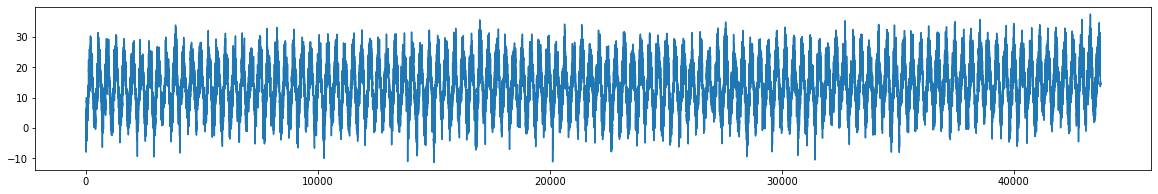

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(20, 3))
datarange = data.size
h = ax.plot(np.linspace(0, datarange, datarange), data[0:datarange])

In [4]:
summer_days = [i for i in range(len(times)) if times[i].month in [6,7,8] ]
data = ds.variables["tx"][summer_days]

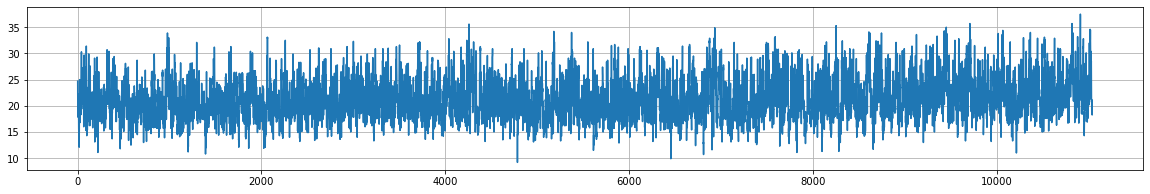

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(20, 3))
datarange = data.size
ax.grid()
h = ax.plot(np.linspace(0, datarange, datarange), data[0:datarange])

In [6]:
block_size = 100
data = data[:(data.size//block_size)*block_size]
block_maxima = np.max(np.reshape(data, (data.size//block_size, block_size)), axis=1).flatten()

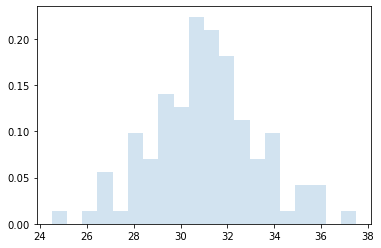

In [7]:
fig, ax = plt.subplots(1, 1)
h = ax.hist(block_maxima, bins=20, density=True, histtype='stepfilled', alpha=0.2)

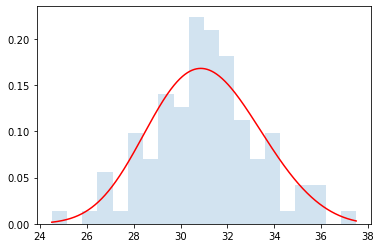

In [8]:
loc, scale, shape = st.genextreme.fit(block_maxima)
gev = st.genextreme(loc, scale, shape)
x = np.linspace(min(block_maxima), max(block_maxima), 1000)
fig, ax = plt.subplots(1, 1)
ax.plot(x, gev.pdf(x), color='r')
h = ax.hist(block_maxima, bins=20, density=True, histtype='stepfilled', alpha=0.2)

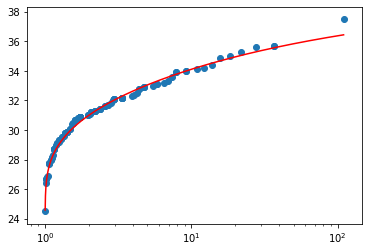

In [10]:
def get_cdf(m):
    return np.count_nonzero(block_maxima >= m)

return_periods = block_maxima.size/np.vectorize(get_cdf)(block_maxima)
fig, ax = plt.subplots(1, 1)
ax.set_xscale("log")
T = np.linspace(min(return_periods), max(return_periods), 100000)
ax.plot(T, gev.ppf(1-1/T), color='r')
h = ax.scatter(return_periods, block_maxima)